In [7]:
import os
from os.path import exists, isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pkg_resources import resource_stream, resource_filename, resource_exists

from Bio import SeqIO
from Bio.PDB import PDBList

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras import Model

import subprocess

from deepet.utils import to_binary, zero_padding
from deepet import my_callbacks

import argparse

### Example usage, obtain embeddings for sequences in fasta file

In [5]:
from deepet.run_inference import DeepETInference
inf_obj = DeepETInference(model='ogt', layer='flatten_1')
df = inf_obj.run_inference(filepath='./data/5.5.1.5.fasta')
df.to_csv('my_sequences_predictions.tsv', sep='\t')

In [4]:
from deepet.run_inference import DeepETInference
inf_obj = DeepETInference(model='ogt', layer='flatten_1')
df = inf_obj.get_embeddings(filepath='./data/5.5.1.5.fasta')
df.to_csv('my_sequences_embeddings.tsv', sep='\t')

In [2]:
from deepet.run_inference import DeepETInference
seq = 'MPSPMEDIEEILITEEQLKAKVKELGEMITRDYEGKDLVLIGVLKGAIMFMSDLSRAIDLPLSIDFMAVSSYGSSTKSSGIVKIIKDHDIDIEGKDVLIVEDIIDSGLTLAYLRETLLGRKPRSLKICTILDKPERREADVKVDYCGFKIPDKFVVGYGLDYAEKYRNLPFIGVLKPELYK'
inf_obj = DeepETInference(model='ogt', layer='flatten_1')
wt, change, z_score = inf_obj.occlusion_1d(seq, window=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


### What does the model look at to determine temperature?

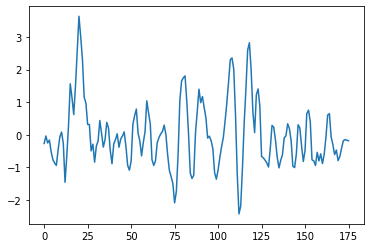

In [4]:
plt.plot(z_score)

In [10]:
outlines = []
outlines.append('bg_color white')
outlines.append('as cartoon')
outlines.append('set cartoon_discrete_colors, 1')
outlines.append('set cartoon_oval_length, 1.0')
outlines.append('set cartoon_oval_width, 0.2')
outlines.append('set ray_trace_mode, 1')
outlines.append('set ray_trace_gain, 0.1')
outlines.append('set ray_shadows, 0')
outlines.append('set ambient, 2')
outlines.append('set antialias, 3')
outlines.append('unset specular')

# prepare the colormap
cmap = matplotlib.cm.get_cmap('bwr')

# a data normalizer
norm = matplotlib.colors.Normalize(vmin=-abs(z_score).max(), vmax=abs(z_score).max())

for i in range(0, len(seq)):
    # get the rgba color for this value
    if i < len(z_score):
        val = z_score[i]
        rgba = cmap(norm(val))

        # convert to hex
        hex_col = matplotlib.colors.to_hex(rgba, keep_alpha=False)
        color = hex_col.upper().replace('#', '0x')
        
    else:
        color = '0xFFFFFF'
    
    # color by category
    outlines.append('color {}, resi {}'.format(color, i+1))
        
# hide hydeogen atoms
outlines.append('hide (hydro)')

with open('1r3u_pymol_coloring_script_z-score.pml', 'w') as f:
    f.write('\n'.join(outlines))